# SVM KERNELS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = np.linspace(-5,5,100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y,-y])
x = np.hstack([x,-x])

In [3]:
x1 = np.linspace(-5,5,100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

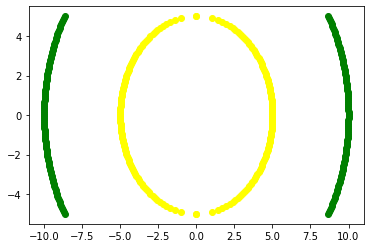

In [4]:
plt.scatter(y,x,c = "green")
plt.scatter(y1,x1,c = "yellow")

In [5]:
df1 = pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1["Y"] = 0
df1

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0
...,...,...,...
195,-8.881281,-4.59596,0
196,-8.828277,-4.69697,0
197,-8.773790,-4.79798,0
198,-8.717792,-4.89899,0


In [6]:
df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2["Y"] = 1
df2

,X1,X2,Y
0,0.000000,-5.00000,1
1,0.999949,-4.89899,1
2,1.406908,-4.79798,1
3,1.714198,-4.69697,1
4,1.969049,-4.59596,1
...,...,...,...
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1


In [7]:
df = df1.append(df2)
df

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0
...,...,...,...
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1


In [8]:
X = df.iloc[:,:-1]
Y = df["Y"]

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 0)

In [18]:
from sklearn.svm import SVC

model = SVC(kernel = "linear")
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [19]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy_score(y_pred,Y_test)

0.45

# RBF KERNEL

In [21]:
from sklearn.svm import SVC

model = SVC(kernel = "rbf")
model.fit(X_train,Y_train)

from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy_score(y_pred,Y_test)

1.0

# POLYNOMIAL KERNEL

In [22]:
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [23]:
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 0)

In [25]:
from sklearn.svm import SVC

model = SVC(kernel = "poly")
model.fit(X_train,Y_train)

from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy_score(y_pred,Y_test)

1.0

In [30]:
import plotly.express as px

fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',
              color='Y')
fig.show()

In [31]:
fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z='X1*X2',
              color='Y')
fig.show()